# Cubic Interpolation

### Overall Intention
To produce a function that maintains the certain essence of a "shape", which is to be applied to the "shape" of the spine later on.

For earlier tests it could be on something *simpler* (i.e. more easily definable) like one period of a sine wave. 

Then, trying to adjust the cubic function to map onto this will be pretty difficult. Then reading whether it has deviated from a certain range (either absolute (if x>5) or relative (if (x_1, y_1) translated [1, 2] i.e. if one point has moved away such that the entire function no longer maps onto its intended output. This may include machine learning techniques)) would, **maybe**, be easier.

### Deadlines
**Deadline: 13/07/25**
- Solve a cubic spline equation by hand and derive applying this to an equation
- Simple model of cubic spline that can work dynamically
- Testing (and understanding how this can be gamed towards fitting a specific shape)

*Going to learn the maths behind this relatively quickly but focus on applying this onto code (and have the rest of it learnt more implicitly). Need to first get one problem set completed fully.*

**Deadline: 20/07/25**
- Some pretty detailed research into the spine to see what it means to have a function fit onto the spine
- Testing with the vector points from the IMUs to produce spline models


#### Test
*Below is a test of using a scipy module for cubic splines to work automatically (with only a rudimentary understanding at this point).*

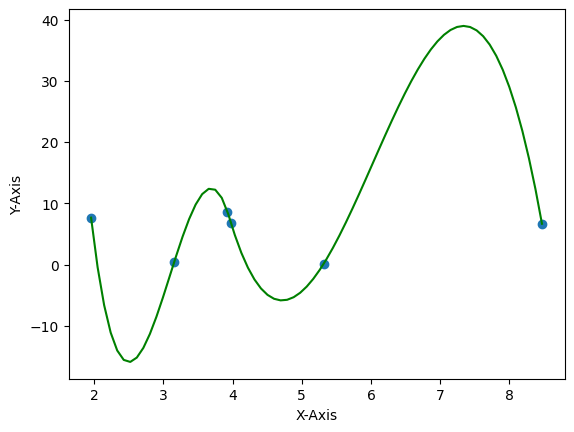

In [21]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import random

# 1D array of data points
x = [random.uniform(0,10) for i in range(6)]
y = [random.uniform(0,10) for i in range(6)]

# cubic function
func_cubic = interp1d(x,y, kind="cubic")

x_interp = np.linspace(np.min(x), np.max(x), 70)

plt.scatter(x, y)
plt.plot(x_interp, func_cubic(x_interp), "green")
plt.ylabel("Y-Axis")
plt.xlabel("X-Axis")
plt.show()

**Notes**:
*An issue with this is the case of overfitting, with certain values (as shown above), where the function over-exaggerates a curve of a function. I am also unsure how this could work with 3D vectors (but I hope it will make it more)*

### Depression
There is a lot to learn for this, the assumption for this is parametrising the main function of S(t) into x(t), y(t) and z(t). 

Specifying this so that it can be generalised to other patients currently doesn't seem possible. Much, much more consideration needs to be taken to be this. 

**List of Sources**:
*Below are the list of the sources that have contributed to this dread:*

https://claude.ai/share/e749c836-d49c-4fa5-ba44-c4146913eab9
https://math.stackexchange.com/questions/577641/how-to-calculate-interpolating-splines-in-3d-space
https://en.wikipedia.org/wiki/B-spline
https://en.wikipedia.org/wiki/Tricubic_interpolation

https://pmc.ncbi.nlm.nih.gov/articles/PMC5298576/
    *This explores an existing method of reading in IMU data into a spline - there are equations there. Thus, I will cite this research and understand it.*

*N.B. Read all of the sources to find out what is relevant and be able to explain the types of interpolating functions as I later have to develop some way of using these curves and making them like the spine!!*

------------
-------------

### Matrix Test
*Want to be able to display matrix notation in markdown in order to demonstrate my process for learning cubic spline calculations*

https://www.upyesp.org/posts/makrdown-vscode-math-notation/

**Simple 3x3 Matrix**:
$$\begin{bmatrix} 
1 & 2 & 3 \\ 
4 & 5 & 6 \\ 
7 & 8 & 9 
\end{bmatrix}$$

**2x2 Matrix Multiplication**:
$$
\begin{bmatrix} a_{11} & a_{12} \\ a_{21} & a_{22} \end{bmatrix} 
\begin{bmatrix} b_{11} & b_{12} \\ b_{21} & b_{22} \end{bmatrix}
= 
\begin{bmatrix} a_{11}b_{11} + a_{12}b_{21} & a_{11}b_{12} + a_{12}b_{22} \\ a_{21}b_{11} + a_{22}b_{21} & a_{21}b_{12} + a_{22}b_{22} \end{bmatrix}
$$

### Cubic Spline Calculations
***More sources to help out with context before jumping into a problem to solve:***
https://math.stackexchange.com/questions/602976/cubic-spline-interpolation-practice


#### Question: Find the cubic spline that maps onto (0,0), (1, 3) and (2, 4)

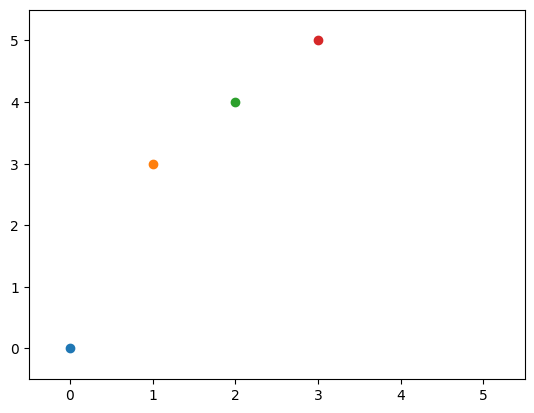

In [11]:
# plot these points
import matplotlib.pyplot as plt

plt.scatter(0,0)
plt.scatter(1,3)
plt.scatter(2,4)
plt.scatter(3,5)

plt.xlim(0-0.5, 5.5)
plt.ylim(-0.5, 5.5)

plt.show()

*For the calculation, I will be using a natural cubic spline*

**Set-up**:
$$
S_0(x) = a_0 + b_0(x) + c_0(x^2) + d_0(x^3) \\
S_1(x) = a_1 + b_1(x-1) + c_1(x-1)^2 + d_1(x-1)^3 \\
S_2(x) = a_2 + b_2(x-2) + c_2(x-2)^2 + d_2(x-2)^3
$$

##### System of Equations:
There are twelve unknowns to solve: 

*Linear equations*
$$
S_0(0) = 0 \implies a_0 = 0 \\
[1]: S_0(1) \mid b_0 + c_0 + d_0 = 1  \\\
\\
S_1(1) = 3 \implies a_1 = 3 \\
[2]: S_1(2) \mid  b_0 + c_0 + d_0 = 1 \\\
\\
S_2(2) = 4 \implies a_2 = 4 \\
[3]: S_2(3) \mid b_2 + c_2 + d_2 = 1 \\\
$$

**There are 6 more equations left**

*Equating derivatives*
$$
S_0'(x) = S_1'(x) \implies b_0 + 2c_0(x) + 3d_0(x)^3 =  \\
S_1'(x) = S_2'(x) \\
\\\
S_0''(x) = S_1''(x) \\
S_1''(x) = S_2''(x) \\
$$
*Boundary conditions*
$$
S_0''(x) = 0
S_2''(x) = 0
$$

###### Final Matrix Form: 
$$
\begin{bmatrix}
b_0 & c_0 & d_0 & b_1 & c_1 & d_1 & b_2 & c_2 & d_2
\cr
...
\end{bmatrix}
$$